In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/metro-traffic-volume/Metro_Interstate_Traffic_Volume.csv


**DATA PREPARATION**

In [90]:
path_to_data = "/kaggle/input/metro-traffic-volume/Metro_Interstate_Traffic_Volume.csv"
data = pd.read_csv(path_to_data)
data.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# Unique value for some column

In [92]:
data['holiday'].unique()

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [93]:
data['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [94]:
data['clouds_all']

0        40
1        75
2        90
3        90
4        75
         ..
48199    75
48200    90
48201    90
48202    90
48203    90
Name: clouds_all, Length: 48204, dtype: int64

**Feature Engineering**

1. Extract based on time and turn it to day, month, year, isWeekend, etc.

2. Convert the degree from Kelvin to Celsius

In [95]:
la# Konversi data 'date_time' ke tipe datetime
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M')
# Ekstraksi fitur waktu
data['hour'] = data['date_time'].dt.hour
data['day_of_week'] = data['date_time'].dt.dayofweek # 0=Senin,6=Minggu
data['day_of_month'] = data['date_time'].dt.day
data['month'] = data['date_time'].dt.month
data['year'] = data['date_time'].dt.year
data['is_weekend'] = data['date_time'].dt.weekday >= 5 # Sabtu dan Minggu

data = data.drop(['date_time'], axis=1)
data.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day_of_week,day_of_month,month,year,is_weekend
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,9,1,2,10,2012,False
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,10,1,2,10,2012,False
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,11,1,2,10,2012,False
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,12,1,2,10,2012,False
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,13,1,2,10,2012,False


In [96]:
data['temp_celsius'] = data['temp'] - 273.1

data.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day_of_week,day_of_month,month,year,is_weekend,temp_celsius
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,9,1,2,10,2012,False,15.18
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,10,1,2,10,2012,False,16.26
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,11,1,2,10,2012,False,16.48
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,12,1,2,10,2012,False,17.03
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,13,1,2,10,2012,False,18.04


3. Make new category features to the column of 'clouds_all'

In [97]:
# buat variabel bins untuk menyimpan persentasi yang di harapkan
bins = [0, 30, 70, 100]
labels = ['low', 'medium', 'high']
# membuat kolom baru bernama 'cloud_categories'
data['cloud_categories'] = pd.cut(data['clouds_all'], bins=bins,
labels=labels, include_lowest=True)
data.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day_of_week,day_of_month,month,year,is_weekend,temp_celsius,cloud_categories
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,9,1,2,10,2012,False,15.18,medium
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,10,1,2,10,2012,False,16.26,high
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,11,1,2,10,2012,False,16.48,high
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,12,1,2,10,2012,False,17.03,high
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,13,1,2,10,2012,False,18.04,high


4. Join the holiday with is_weekend IF the day is the same

In [98]:
# New column to indicate that at the weekend there is national holiday or not
data['is_weekend_and_holiday'] = (data['is_weekend'] & data['holiday'].notnull())

# Show the data
data[['is_weekend', 'holiday', 'is_weekend_and_holiday']]
data['is_weekend_and_holiday'].unique()


array([False])

It can be seen that there are no national holidays that coincide with weekends in this dataset.

5. Make new feature 'is_precipitation' that join the column of 'rain_1h' and 'snow_1h'

In [99]:
# bernilai true jika salah satu dari rain_1h dan snow_1h bernilai > 0 mm
data['is_precipitation'] = (data['rain_1h'] > 0) | (data['snow_1h'] > 0)
# tampilakan data
data[['rain_1h', 'snow_1h', 'is_precipitation']]

,rain_1h,snow_1h,is_precipitation
0,0.0,0.0,False
1,0.0,0.0,False
2,0.0,0.0,False
3,0.0,0.0,False
4,0.0,0.0,False
...,...,...,...
48199,0.0,0.0,False
48200,0.0,0.0,False
48201,0.0,0.0,False
48202,0.0,0.0,False


6. Make a lag feature for the volume traffic volume

This is so that the model can easily predict future traffic volume by looking at the pattern 'was the traffic volume large 1 hour ago?' If so, the model will predict a large traffic volume.

In [100]:
# mengurutkan data
data = data.sort_values(by=['year', 'month', 'day_of_month', 'hour'])

# assign kolom baru untuk lag feature
data['traffic_volume_lag1'] = data['traffic_volume'].shift(1) # 1 jam sebelumnya
data['traffic_volume_lag24'] = data['traffic_volume'].shift(24) # 24 jam sebelumnya
data['traffic_volume_lag168'] = data['traffic_volume'].shift(168) # 7 hari sebelumnya

# menampilkan data terbaru
print(data.head())

   traffic_volume holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0            5545     NaN  288.28      0.0      0.0          40       Clouds   
1            4516     NaN  289.36      0.0      0.0          75       Clouds   
2            4767     NaN  289.58      0.0      0.0          90       Clouds   
3            5026     NaN  290.13      0.0      0.0          90       Clouds   
4            4918     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description  hour  day_of_week  ...  month  year  is_weekend  \
0    scattered clouds     9            1  ...     10  2012       False   
1       broken clouds    10            1  ...     10  2012       False   
2     overcast clouds    11            1  ...     10  2012       False   
3     overcast clouds    12            1  ...     10  2012       False   
4       broken clouds    13            1  ...     10  2012       False   

   temp_celsius  cloud_categories is_weekend_and_holiday  is_precipitation

Encoding Categorical Data
- Using Frequency Encoding for weather_description

In [101]:
frequency = data['weather_description'].value_counts()
data['weather_description_encoded'] = data['weather_description'].map(frequency)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   traffic_volume               48204 non-null  int64   
 1   holiday                      61 non-null     object  
 2   temp                         48204 non-null  float64 
 3   rain_1h                      48204 non-null  float64 
 4   snow_1h                      48204 non-null  float64 
 5   clouds_all                   48204 non-null  int64   
 6   weather_main                 48204 non-null  object  
 7   weather_description          48204 non-null  object  
 8   hour                         48204 non-null  int32   
 9   day_of_week                  48204 non-null  int32   
 10  day_of_month                 48204 non-null  int32   
 11  month                        48204 non-null  int32   
 12  year                         48204 non-null  int32   
 13  i

- Using OneHotEncoding to encode weather_main

In [102]:
# One-hot encoding untuk kolom 'weather_main'
data = pd.get_dummies(data, columns=['weather_main'], prefix='weather')
# Cek hasilnya
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   traffic_volume               48204 non-null  int64   
 1   holiday                      61 non-null     object  
 2   temp                         48204 non-null  float64 
 3   rain_1h                      48204 non-null  float64 
 4   snow_1h                      48204 non-null  float64 
 5   clouds_all                   48204 non-null  int64   
 6   weather_description          48204 non-null  object  
 7   hour                         48204 non-null  int32   
 8   day_of_week                  48204 non-null  int32   
 9   day_of_month                 48204 non-null  int32   
 10  month                        48204 non-null  int32   
 11  year                         48204 non-null  int32   
 12  is_weekend                   48204 non-null  bool    
 13  t

- Encode cloud_categories with ordinal encoding

In [103]:
# memastikan bahwa data sudah ter sort dengan baik
data['cloud_categories'] = pd.Categorical(data['cloud_categories'], categories=['low', 'medium', 'high'], ordered=True)

# encode
# Mengonversi kategori ordinal menjadi numerik
data['cloud_categories_encoded'] = data['cloud_categories'].cat.codes

# Cek hasil encoding
print(data[['cloud_categories', 'cloud_categories_encoded']].head())

  cloud_categories  cloud_categories_encoded
0           medium                         1
1             high                         2
2             high                         2
3             high                         2
4             high                         2


- Encode holiday column with frequency encode and fill the null value with 'no holiday'

In [104]:
# isi missing value dengan 'No Holiday'
data['holiday'] = data['holiday'].fillna('No Holiday')

frequency = data['holiday'].value_counts()
data['holiday_encoded'] = data['holiday'].map(frequency)

data[['holiday', 'holiday_encoded']]

,holiday,holiday_encoded
0,No Holiday,48143
1,No Holiday,48143
2,No Holiday,48143
3,No Holiday,48143
4,No Holiday,48143
...,...,...
48199,No Holiday,48143
48200,No Holiday,48143
48201,No Holiday,48143
48202,No Holiday,48143


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   traffic_volume               48204 non-null  int64   
 1   holiday                      48204 non-null  object  
 2   temp                         48204 non-null  float64 
 3   rain_1h                      48204 non-null  float64 
 4   snow_1h                      48204 non-null  float64 
 5   clouds_all                   48204 non-null  int64   
 6   weather_description          48204 non-null  object  
 7   hour                         48204 non-null  int32   
 8   day_of_week                  48204 non-null  int32   
 9   day_of_month                 48204 non-null  int32   
 10  month                        48204 non-null  int32   
 11  year                         48204 non-null  int32   
 12  is_weekend                   48204 non-null  bool    
 13  t

- Handle missing value from traffic_volumelag1, traffic_volumelag24, traffic_volumelag168

In [106]:
# Imputasi dengan 0
data[['traffic_volume_lag1', 'traffic_volume_lag24', 'traffic_volume_lag168']] = data[['traffic_volume_lag1',
'traffic_volume_lag24', 'traffic_volume_lag168']].fillna(0)

data.isnull().sum()

traffic_volume                 0
holiday                        0
temp                           0
rain_1h                        0
snow_1h                        0
clouds_all                     0
weather_description            0
hour                           0
day_of_week                    0
day_of_month                   0
month                          0
year                           0
is_weekend                     0
temp_celsius                   0
cloud_categories               0
is_weekend_and_holiday         0
is_precipitation               0
traffic_volume_lag1            0
traffic_volume_lag24           0
traffic_volume_lag168          0
weather_description_encoded    0
weather_Clear                  0
weather_Clouds                 0
weather_Drizzle                0
weather_Fog                    0
weather_Haze                   0
weather_Mist                   0
weather_Rain                   0
weather_Smoke                  0
weather_Snow                   0
weather_Sq

7. Handling Outlier
- Using boxplot to know which is the outlier

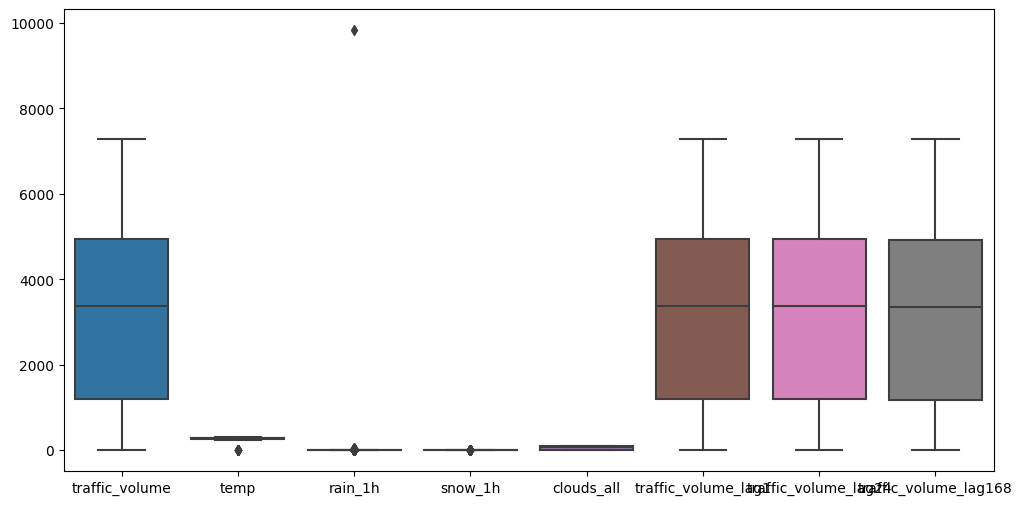

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisasi outlier dengan boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['traffic_volume', 'temp', 'rain_1h', 'snow_1h',
'clouds_all','traffic_volume_lag1', 'traffic_volume_lag24',
'traffic_volume_lag168']])
plt.show()

In [108]:
# inisiasi numerical columns
numerical_columns = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h',
'clouds_all', 'traffic_volume_lag1', 'traffic_volume_lag24', 'traffic_volume_lag168']

# Menghitung Q1, Q3, dan IQR
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = (data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound)

# Menampilkan jumlah outlier pada setiap kolom
print(outliers.sum())

traffic_volume              0
temp                       10
rain_1h                  3467
snow_1h                    63
clouds_all                  0
traffic_volume_lag1         0
traffic_volume_lag24        0
traffic_volume_lag168       0
dtype: int64


In [109]:
# Menghapus baris yang mengandung outlier
data_cleaned = data[~(outliers.any(axis=1))]
# Mengecek jumlah baris setelah penghapusan
print(data_cleaned.shape)

(44668, 34)


In [110]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44668 entries, 0 to 48203
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   traffic_volume               44668 non-null  int64   
 1   holiday                      44668 non-null  object  
 2   temp                         44668 non-null  float64 
 3   rain_1h                      44668 non-null  float64 
 4   snow_1h                      44668 non-null  float64 
 5   clouds_all                   44668 non-null  int64   
 6   weather_description          44668 non-null  object  
 7   hour                         44668 non-null  int32   
 8   day_of_week                  44668 non-null  int32   
 9   day_of_month                 44668 non-null  int32   
 10  month                        44668 non-null  int32   
 11  year                         44668 non-null  int32   
 12  is_weekend                   44668 non-null  bool    
 13  temp_c

**Exploratory Data Analysis**

# 1. DISTRIBUTION OF TARGET VARIABLE (Traffic Volume)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


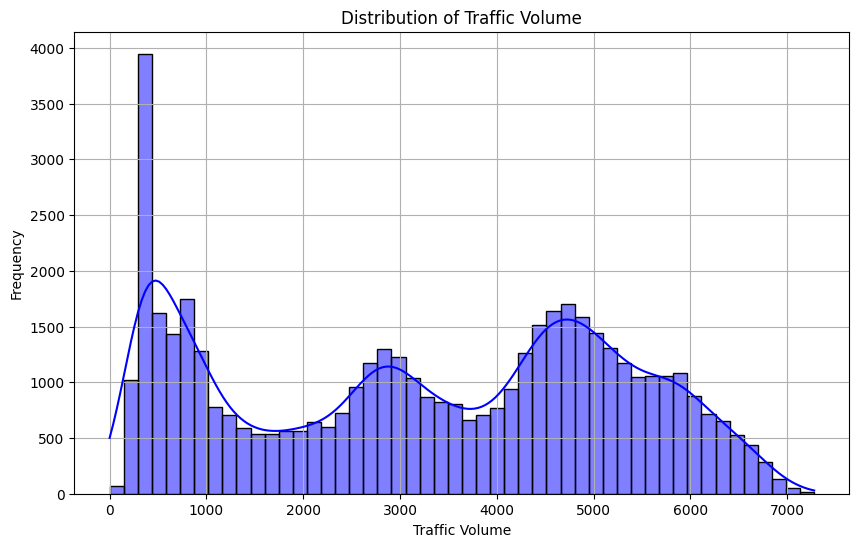

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(data['traffic_volume'], bins=50, kde=True, color='blue')
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Dari grafik diatas, kita bisa mengambil kesimpulan bahwa Traffic Volume paling padat berada pada jarak 0-1000 dimana terdapat frekuensi yang paling tinggi didaerah itu.

# 2. Time-Based Analysis

/tmp/ipykernel_30/418793127.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='traffic_volume', data=data, ci=None, marker='o', color='green')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


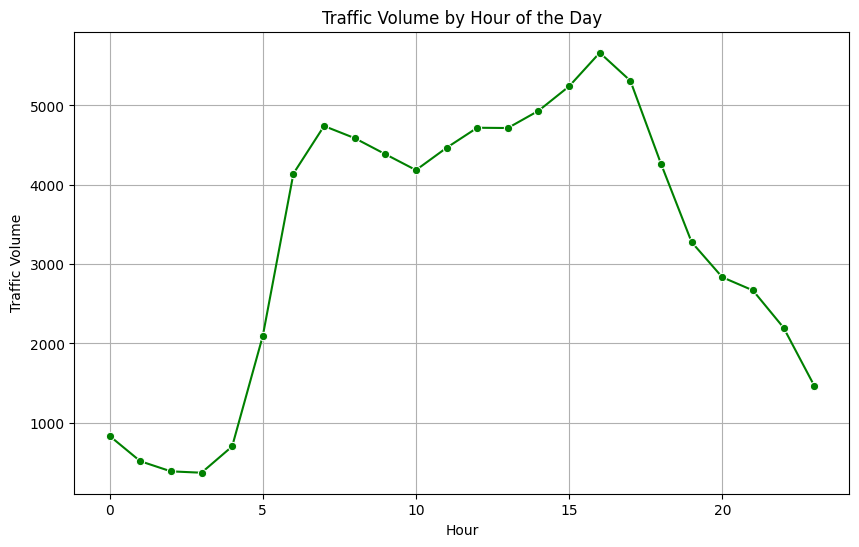

In [112]:
# Traffic Volume by Hour of the Day
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='traffic_volume', data=data, ci=None, marker='o', color='green')
plt.title('Traffic Volume by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

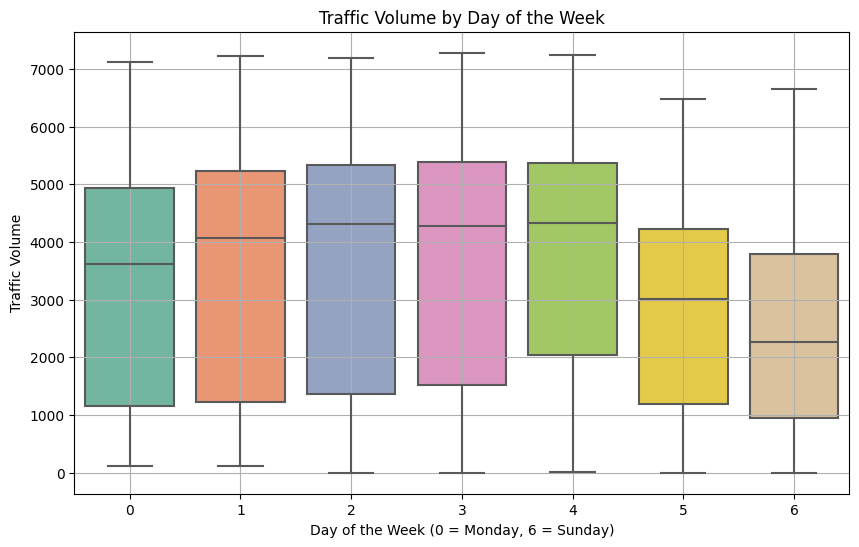

In [113]:
# Traffic Volume by Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='traffic_volume', data=data, palette='Set2')
plt.title('Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

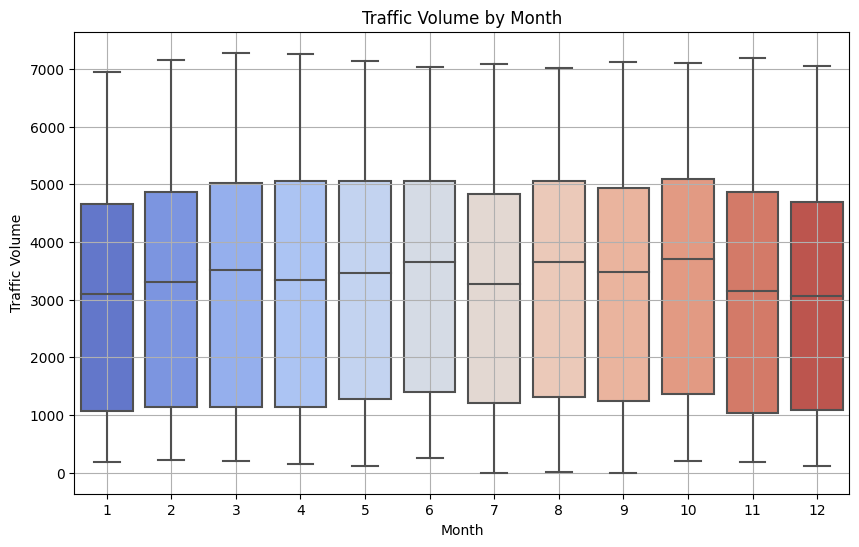

In [114]:
# Traffic Volume by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='traffic_volume', data=data, palette='coolwarm')
plt.title('Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

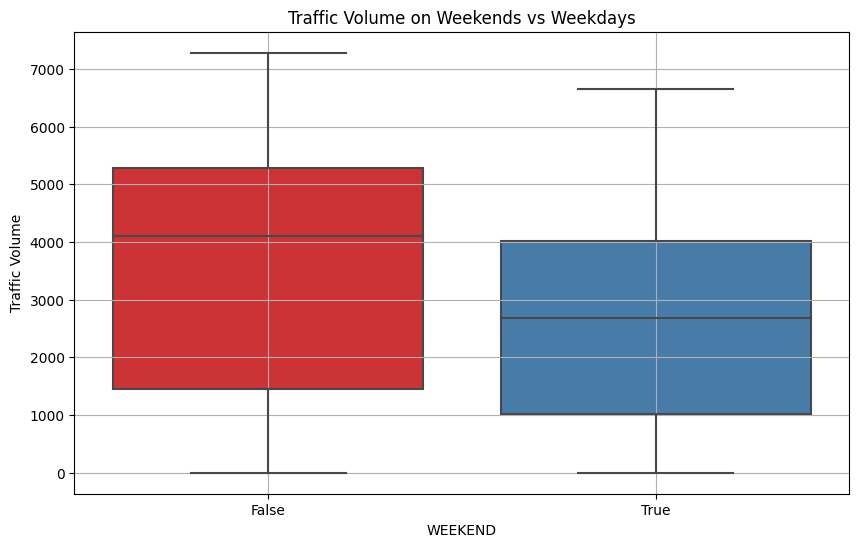

In [115]:
# Weekend vs Weekday Traffic
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_weekend', y='traffic_volume', data=data, palette='Set1')
plt.title('Traffic Volume on Weekends vs Weekdays')
plt.xlabel('WEEKEND')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

**Berdasarkan Time Based Analysis, ada beberapa poin yang bisa diambil yakni:**
- Kepadatan traffic paling tinggi utamanya pada siang - sore hari, sesuatu hal yang umum mengingat banyak masyarakat beraktifitas pada jam jam tersebut
- Volume lalu lintas paling tinggi terjadi pada hari kerja, dengan penurunan signifikan pada akhir pekan, terutama pada hari Minggu. Ini bisa dihubungkan dengan aktivitas sehari-hari seperti perjalanan menuju pekerjaan yang berkurang pada akhir pekan dan masyarakat memilih untuk tidak melakukan perjalanan ke suatu tempat
- Volume lalu lintas tampaknya relatif stabil sepanjang tahun, tanpa adanya pola musiman yang jelas. Meskipun mungkin ada sedikit variasi antara bulan, tidak ada bulan tertentu yang menunjukkan perbedaan signifikan dalam volume lalu lintas.

# 3. Weather Impact Analysis

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   traffic_volume               48204 non-null  int64   
 1   holiday                      48204 non-null  object  
 2   temp                         48204 non-null  float64 
 3   rain_1h                      48204 non-null  float64 
 4   snow_1h                      48204 non-null  float64 
 5   clouds_all                   48204 non-null  int64   
 6   weather_description          48204 non-null  object  
 7   hour                         48204 non-null  int32   
 8   day_of_week                  48204 non-null  int32   
 9   day_of_month                 48204 non-null  int32   
 10  month                        48204 non-null  int32   
 11  year                         48204 non-null  int32   
 12  is_weekend                   48204 non-null  bool    
 13  t

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


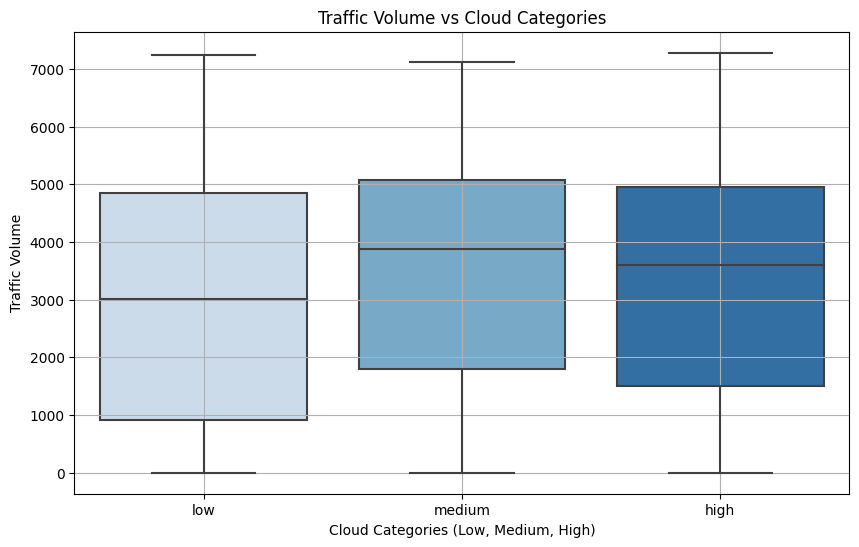

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cloud_categories', y='traffic_volume', data=data, palette='Blues')
plt.title('Traffic Volume vs Cloud Categories')
plt.xlabel('Cloud Categories (Low, Medium, High)')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

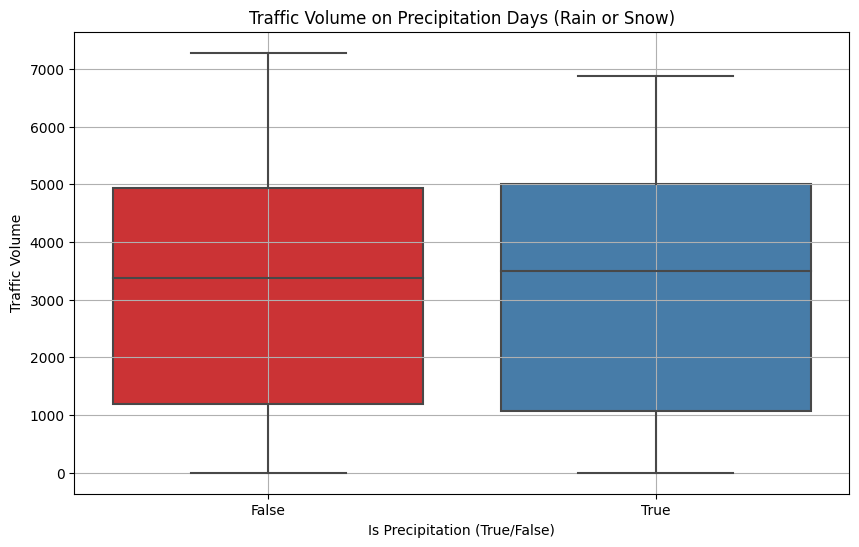

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_precipitation', y='traffic_volume', data=data, palette='Set1')
plt.title('Traffic Volume on Precipitation Days (Rain or Snow)')
plt.xlabel('Is Precipitation (True/False)')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

**Jika melihat berdasarkan cuaca yang sedang berlangsung, maka beberapa poin yang bisa didapatkan adalah**
- Secara keseluruhan, tidak ada hubungan yang terlalu signifikan antara kategori cloud (Low, Medium, High) dengan volume lalu lintas, karena ketiga kategori tersebut memiliki distribusi volume lalu lintas yang hampir serupa.
- Presipitasi mungkin memiliki dampak terbatas pada volume lalu lintas, dengan sedikit peningkatan pada hari-hari berpresipitasi, tetapi variasi di dalam kedua kategori tetap tinggi.
- Dari 2 poin diatas, Secara umum, terjadinya presipitasi dan pembagian kategori cloud tampaknya tidak memiliki pengaruh yang sangat signifikan terhadap volume lalu lintas, meskipun ada sedikit perbedaan pada presipitasi dan kategori cloud tertentu.

# 4. Correlation Matrix

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   traffic_volume               48204 non-null  int64   
 1   holiday                      48204 non-null  object  
 2   temp                         48204 non-null  float64 
 3   rain_1h                      48204 non-null  float64 
 4   snow_1h                      48204 non-null  float64 
 5   clouds_all                   48204 non-null  int64   
 6   weather_description          48204 non-null  object  
 7   hour                         48204 non-null  int32   
 8   day_of_week                  48204 non-null  int32   
 9   day_of_month                 48204 non-null  int32   
 10  month                        48204 non-null  int32   
 11  year                         48204 non-null  int32   
 12  is_weekend                   48204 non-null  bool    
 13  t

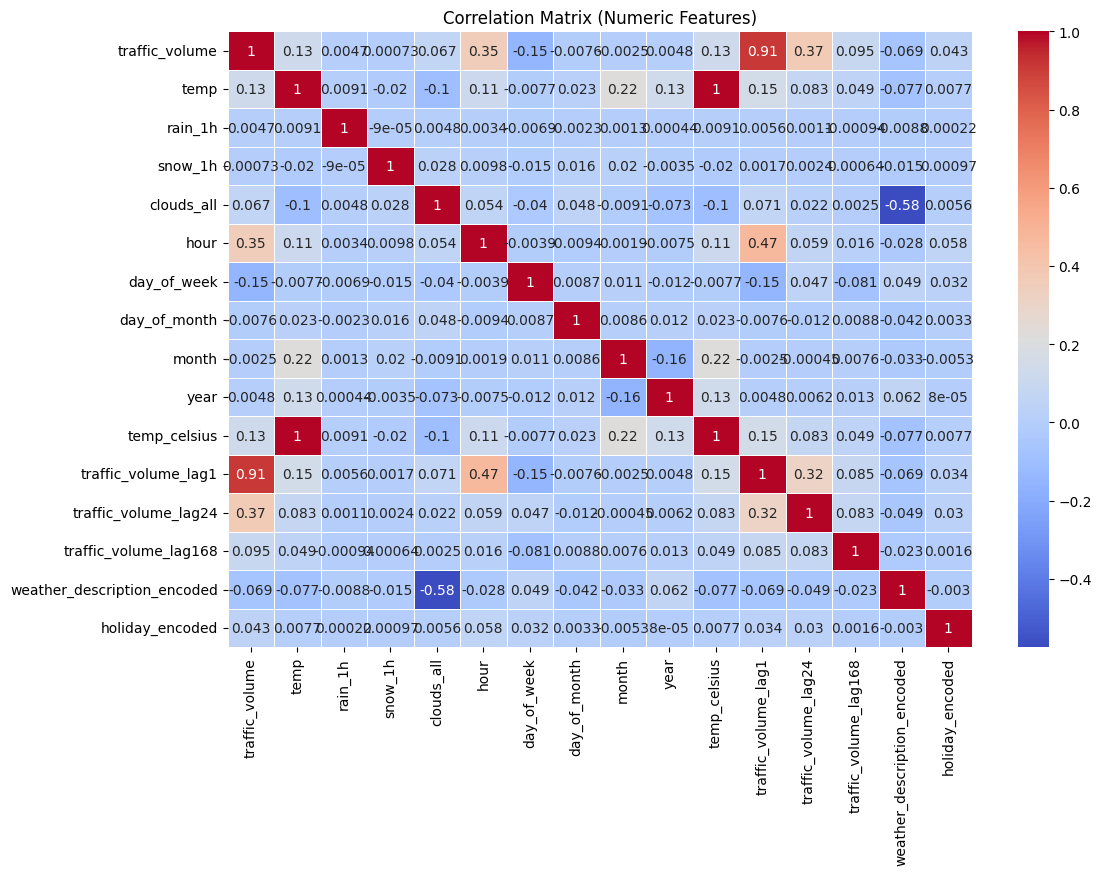

In [134]:
numeric_columns = data.select_dtypes(include=['float64', 'int64', 'int32'])
correlation_matrix = numeric_columns.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

**Pembuatan Matriks Korelasi diatas memiliki beberapa poin umum seperti:**
- Volume lalu lintas lebih dipengaruhi oleh faktor internal seperti waktu (jam) dan volume di waktu sebelumnya (lag) daripada faktor cuaca.
- Faktor cuaca seperti curah hujan, salju, dan banyaknya awan tidak memiliki pengaruh signifikan terhadap volume lalu lintas.
- Waktu dalam hari dan hari dalam minggu memengaruhi volume lalu lintas, dengan puncak yang mungkin terjadi pada jam-jam tertentu dan penurunan pada hari-hari tertentu seperti akhir pekan atau hari libur.

# 5. Categorical Feature Analysis

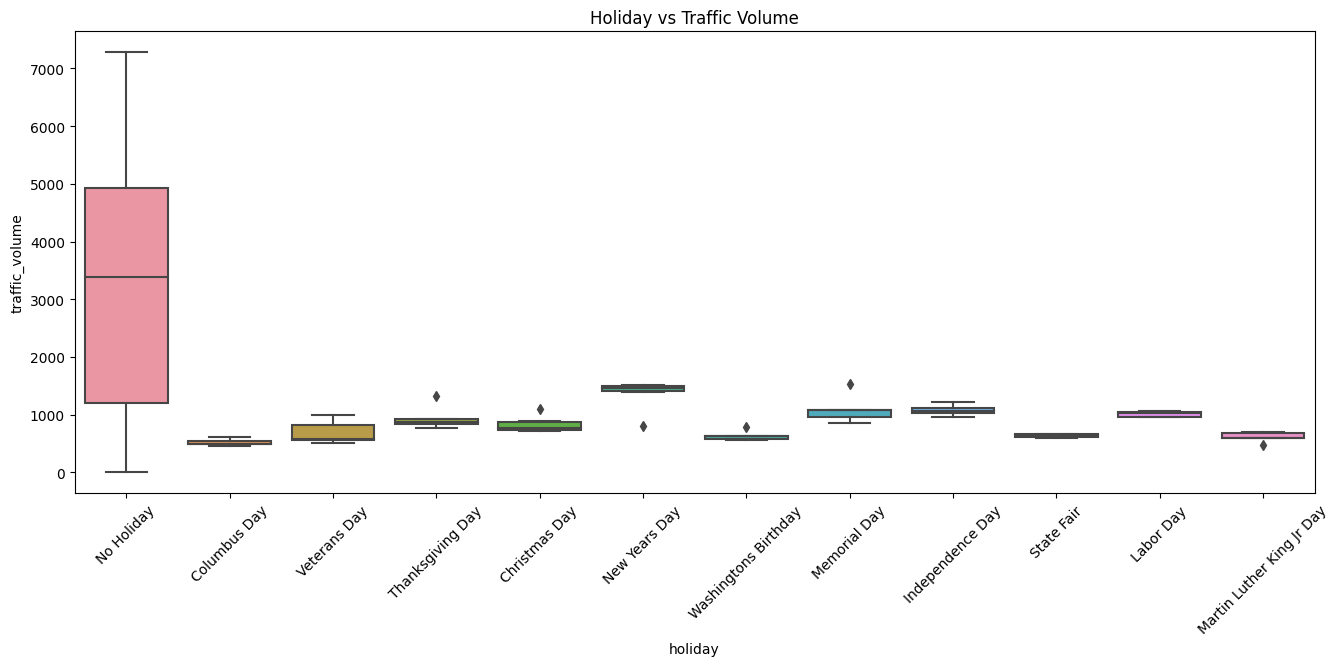

In [141]:
plt.figure(figsize=(16, 6))  
sns.boxplot(x='holiday', y='traffic_volume', data=data)
plt.title('Holiday vs Traffic Volume')
plt.xticks(rotation=45)  # Rotate the labels slightly if they overlap for a better view
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


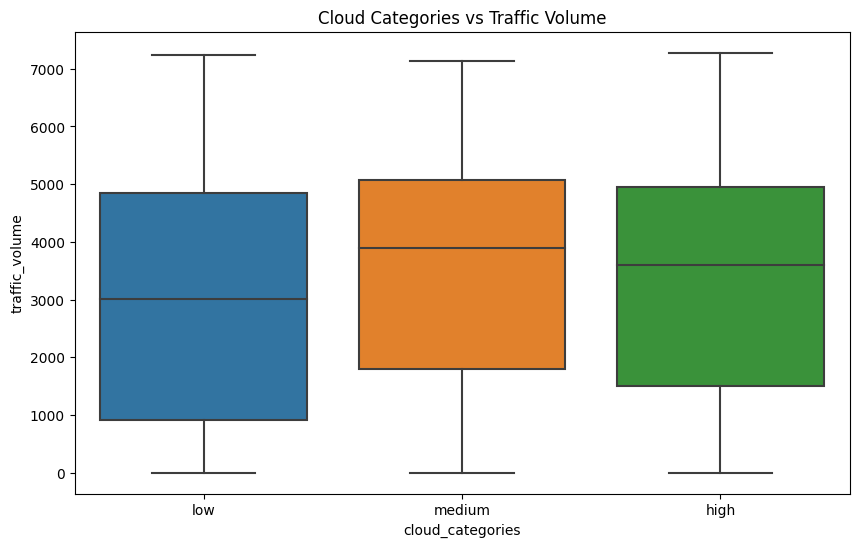

In [138]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cloud_categories', y='traffic_volume', data=data)
plt.title('Cloud Categories vs Traffic Volume')
plt.show()

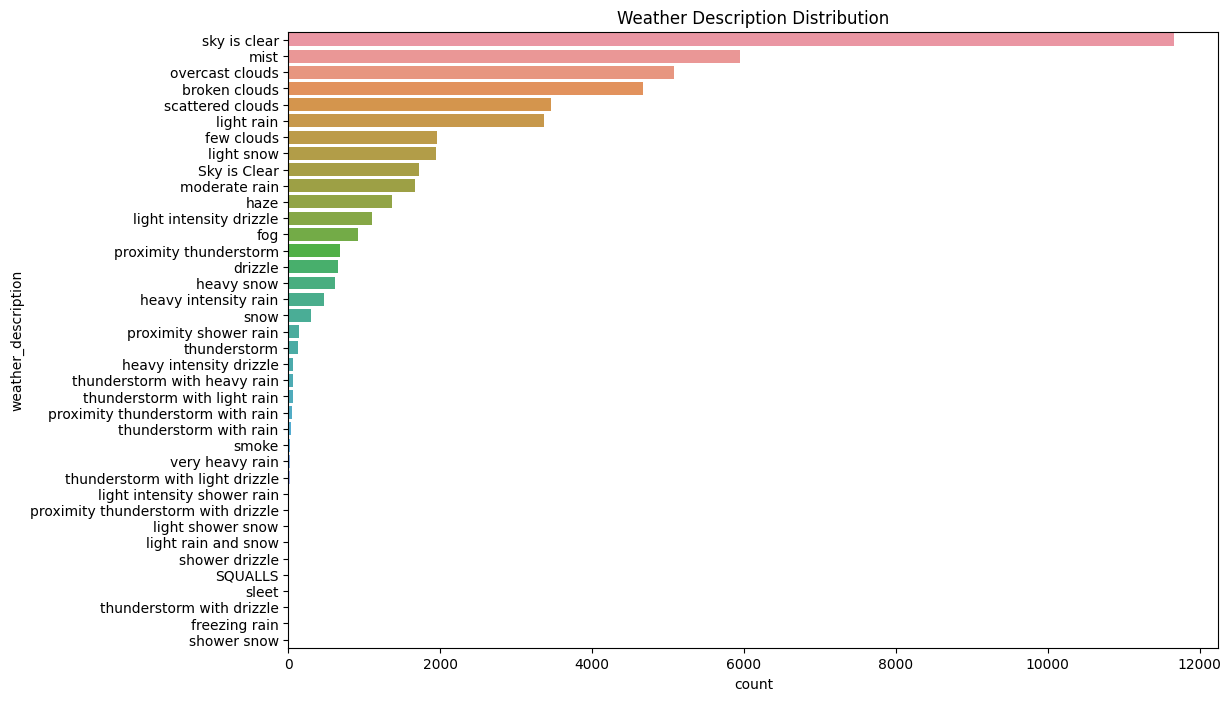

In [139]:
# Distribution of 'weather_description'
plt.figure(figsize=(12, 8))
sns.countplot(y='weather_description', data=data, order=data['weather_description'].value_counts().index)
plt.title('Weather Description Distribution')
plt.show()

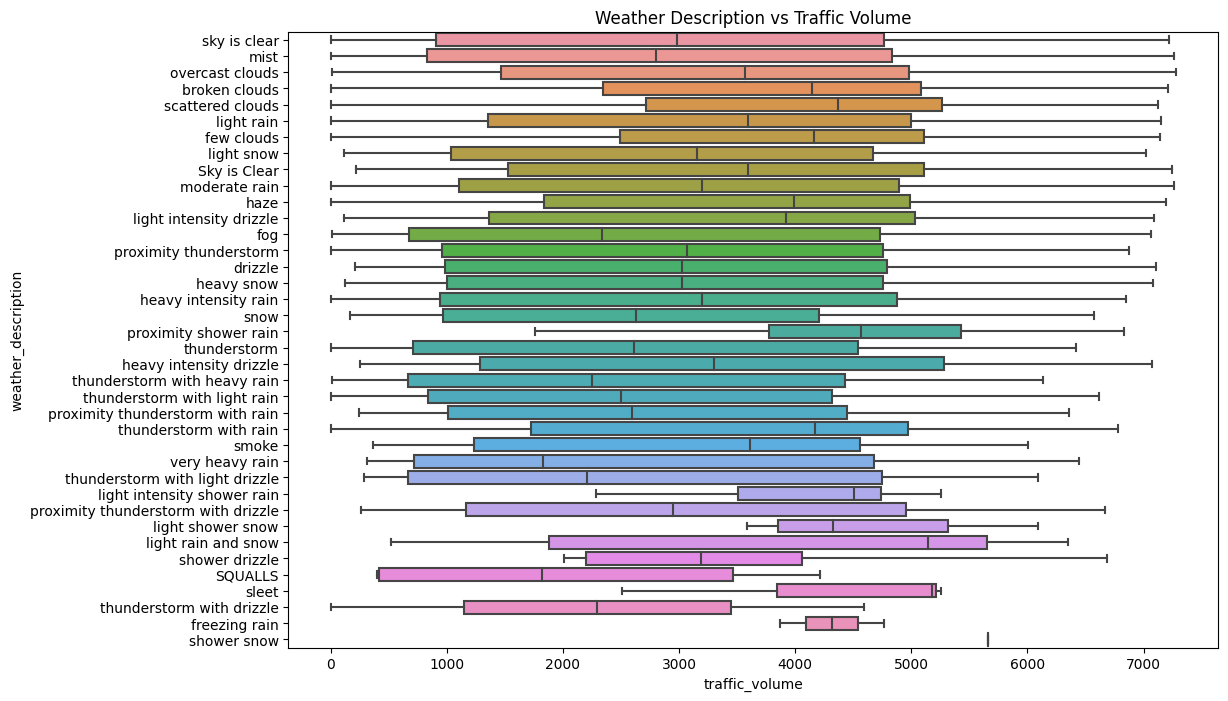

In [140]:
plt.figure(figsize=(12, 8))
sns.boxplot(y='weather_description', x='traffic_volume', data=data, order=data['weather_description'].value_counts().index)
plt.title('Weather Description vs Traffic Volume')
plt.show()

**Berdasarkan Categorical Feature Analysis tersebut, beberapa poin pentingnya adalah:**
- Secara keseluruhan, hari libur memiliki pengaruh lebih signifikan terhadap volume lalu lintas dibandingkan dengan kategori berdasarkan awan.
- Hari libur tertentu berdampak signifikan pada volume lalu lintas. Columbus Day menonjol sebagai hari dengan volume lalu lintas tertinggi di antara hari-hari libur lainnya.
- Sebagian besar hari libur lainnya menunjukkan distribusi yang lebih datar dan tidak ada perbedaan volume lalu lintas yang signifikan.
- Cuaca cerah (sky is clear) adalah kondisi cuaca yang paling umum, sedangkan kondisi cuaca ekstrem atau dengan curah hujan tinggi seperti badai petir dan hujan lebat sangat jarang terjadi.
- Volume lalu lintas cenderung lebih tinggi pada kondisi cuaca cerah (sky is clear) dan menurun pada kondisi cuaca ekstrem seperti badai petir dan salju. Cuaca mendung atau berawan juga menunjukkan volume lalu lintas yang cukup tinggi, tetapi tidak setinggi saat cuaca cerah